In [1]:
# build-in module
import os
from urllib.parse import urlparse
import json

# 3rd party module
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Load data

In [2]:
data_path = '../data'
df = pd.read_csv(f'{data_path}/news.csv', keep_default_na=False)
df = df.dropna()

## Website domain distribution

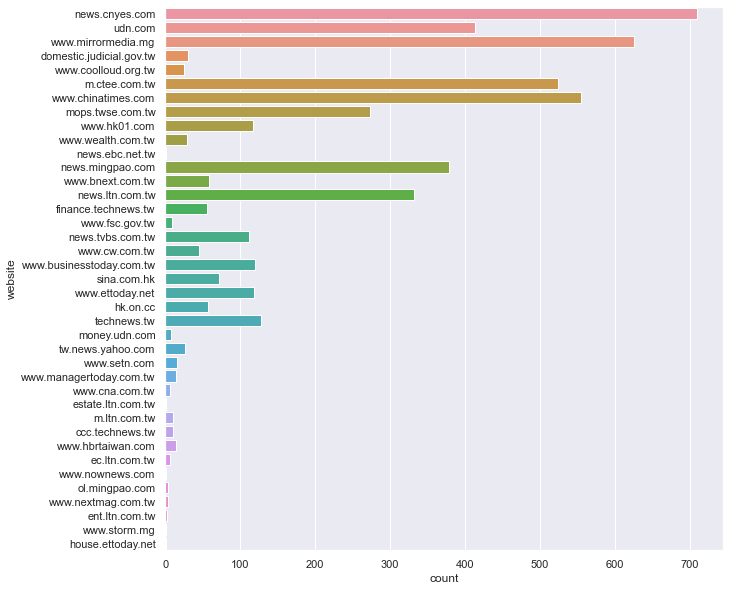

In [3]:
# get value count
df['website'] = df['hyperlink'].apply(lambda link: urlparse(link).netloc)
website_count = df['website'].value_counts()

# plot figure
df['website'] = df['hyperlink'].apply(lambda link: urlparse(link).netloc)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
ax = sns.countplot(y="website", data=df)

## Get all the name related to AML

In [4]:
df

,news_ID,hyperlink,content,name,website
0,1,https://news.cnyes.com/news/id/4352432,"近年來投資市場波動越來越明顯,追求低波動、絕對報酬的量化交易備受注目。專家表示,採用量化交易...",,news.cnyes.com
1,2,https://udn.com/news/story/120775/4112519,"10月13日晚間發生Uber Eats黃姓外送人員職災死亡案件,北市府勞動局認定業者未依職業...",,udn.com
2,3,https://www.mirrormedia.mg/story/20191008soc011/,"君鴻酒店業者控訴高雄地院強制法拍龐大資產,是為了讓財團得利。君鴻業主表示,拍得君鴻的凱德唐公...",,www.mirrormedia.mg
3,5,http://domestic.judicial.gov.tw/abbs/wkw/WHD9H...,主旨:公告本院108年度司家催字第58號公示催告事件裁定。 一、本案遺產管理人為國軍退除役官...,,domestic.judicial.gov.tw
4,6,http://www.coolloud.org.tw/node/93356,"內政部都市計畫委員會委員為審查大社工業區是否降為乙種工業區,將於8月30日到高雄大社現勘(註...",,www.coolloud.org.tw
...,...,...,...,...,...
4909,5019,https://udn.com/news/story/120538/4032584,"香港特首林鄭月娥4日宣布撤回逃犯條例修訂,示威者斥為「太遲太少」,「一碗水救不了森林大火」,...",,udn.com
4910,5020,https://news.cnyes.com/news/id/4357901,"OTC 持續向上推進,今天的好消息是,最快在兩週內,美方就會對美國企業批准發放許可,重啟對華...",,news.cnyes.com
4911,5021,http://www.coolloud.org.tw/node/93286,"【新聞稿】「過激學生報告輔大學務長,官署同意宮廟學生遠學堂!」--譴責教育部縱容輔大停招系所...",,www.coolloud.org.tw
4912,5022,https://www.chinatimes.com/realtimenews/201907...,史上金額最大開發案「台北雙子星」最優申請人「南海團隊」香港商南海發展有限公司、馬來西亞商馬頓...,,www.chinatimes.com


In [5]:
# get all label
labels = df['name'].tolist()
labels = [label.split(',') for label in labels if label != '']

# get all names
names = []
for label in labels:
    names.extend([name for name in label if name not in names])

In [6]:
# get news url related to name
names_urls_df = pd.DataFrame(index=names, columns=['website', 'url'])
for name, row in names_urls_df.iterrows():
    urls = df[df['name'].apply(lambda names: name in names)]['hyperlink'].tolist()
    websites = ['http://'+urlparse(url).netloc for url in urls]
    row['website'] = websites
    row['url'] = urls

In [7]:
# list news url related to name
name = '徐正倫'
print(f'website: {names_urls_df.loc[name]["website"]}')
print(f'hyperlink: {names_urls_df.loc[name]["url"]}')
print(f'content: {len(df[df["hyperlink"] == names_urls_df.loc[name]["url"][0]]["content"].tolist()[0])}')

website: ['http://www.chinatimes.com']
hyperlink: ['https://www.chinatimes.com/realtimenews/20190522001845-260402?chdtv']
content: 946
